# Évaluer l'impact des facteurs biomédicaux sur la probabilité de développer de l'arthrose

**Contexte**

La clinique  Vital Joint Wellness Clinic souhaite mieux comprendre les facteurs contribuant au développement de l'arthrose chez ses patients. L'objectif est d'identifier l'impact des différents facteurs biomédicaux sur la probabilité de développer cette condition. Ces facteurs comprennent les niveaux de sucre dans le sang (glycémie), les niveaux de lipides dans le sang (cholestérol), l'âge, le genre, et la prise de traitements médicaux.

## Mise en situation

Le but de cette mission consiste à démystifier à combien de possibilité près de développer une arthrose. La clinique  Vital Joint Wellness Clinic  souhaite précisément connaître les facteurs qui contribuent à cette maladie. En effet, cette clinique, dans son bilan semestriel réalise que plusieurs sont les patients qui souffrent de cette maladie.  

**Question de recherche : Quel est l'impact des facteurs biomédicaux sur la probabilité de développer de l'arthrose ?**



## Importation des bibliothèques pour notre mission

In [1]:
# Importation des bibliothèques
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

## Importation de la base de données

In [2]:
donne_arthrose = pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\Formation pratique\DonneSante.xlsx')

# afficher les données
donne_arthrose 

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin


## 1. Pré-traitement de la base de données

<Axes: >

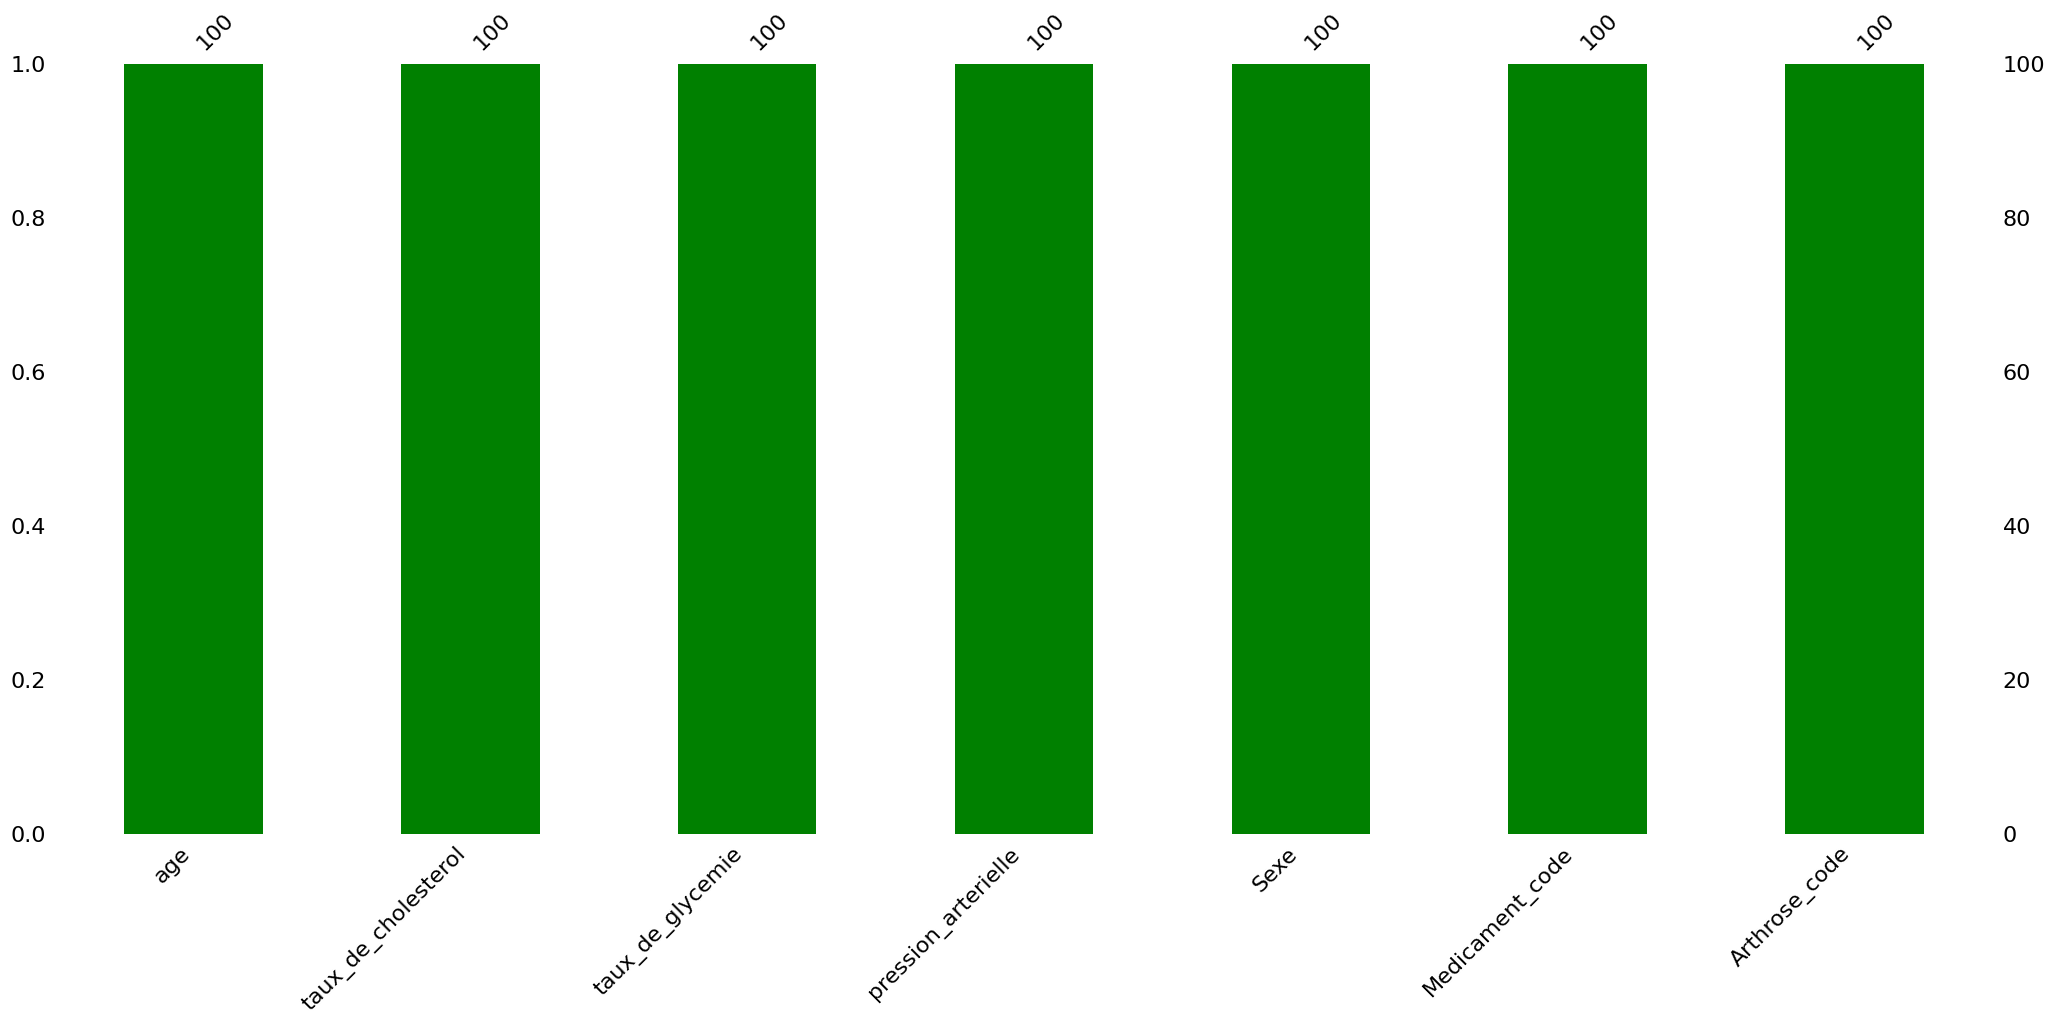

In [3]:
#écarter les variables catégorielles dans la base de données
numericData = donne_arthrose.select_dtypes(exclude=['object']) 

#supprimer certaines variables inutiles dans la base de données
execptData =numericData.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']) 

#afficher graphiquement les données manquantes de la base de données
msno.bar(execptData, color='green') 

### 1.1. Détection des valeurs abérrantes

In [4]:
#détection les valeurs abérrantes par la méthode IQR
Q1 =  execptData.quantile(0.25)
Q3 =  execptData.quantile(0.75)
IQR = Q3 - Q1

outliers = ((execptData<(Q1-1.5*IQR))|(execptData >(Q3+1.5*IQR)))
valeurs_aberrantes=execptData[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes


les valeurs aberrantes sont : 


,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code


Les résultats de la méthode IQR appliquée sur notre jeu de données montre que les variables ne présentent pas de valeurs abérrantes. Ce qui est un facteur très prometteur sur la performance du modèle qu'on utilisera. De plus, le graphique ci-dessus montre avec certitude que notre base de données ne présente ni de doublons, ni de valeurs manquantes, avançant très bien notre étude.

## 2. Analyse exploratoire des données

### 2.1. Statistique descriptive

In [5]:
statistic= execptData.describe()
statistic

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000
mean,56.100000,227.600000,111.790000,131.870000,0.55,1.090000,0.480000
std,20.637076,44.599678,20.131033,25.040837,0.50,0.842015,0.502117
min,20.000000,150.000000,72.000000,90.000000,0.00,0.000000,0.000000
25%,37.750000,186.250000,95.000000,111.500000,0.00,0.000000,0.000000
50%,57.000000,229.000000,114.000000,130.000000,1.00,1.000000,0.000000
75%,74.000000,269.250000,127.000000,154.000000,1.00,2.000000,1.000000
max,90.000000,299.000000,150.000000,179.000000,1.00,2.000000,1.000000


### 2.2. Visualisation de la distribution des variables numériques et catégorielles

C:\Users\ARMIDE Informatique\AppData\Local\Temp\ipykernel_6824\25188584.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arthrose_code', data=dataexpect, palette='muted',color='purple')


[Text(0.5, 1.0, 'Histogramme et densité des variables')]

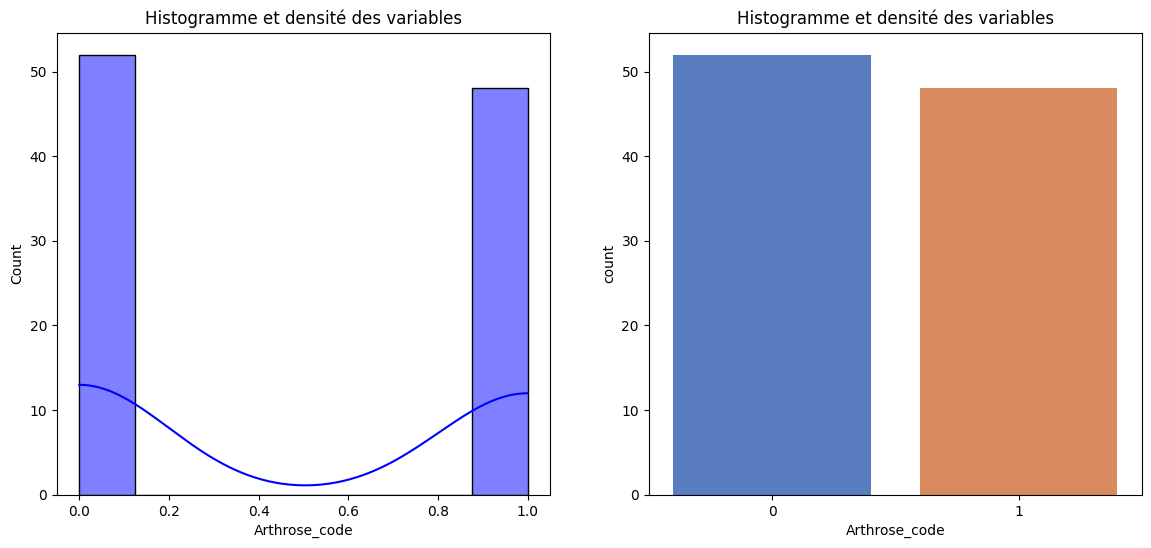

In [6]:
dataexpect = donne_arthrose.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
fig, ax =plt.subplots(1,2,figsize=(14,6))
sns.histplot(dataexpect['Arthrose_code'], kde=True, color='blue', ax=ax[0])
ax[0].set(
    title='Histogramme et densité des variables'
)
sns.countplot(x='Arthrose_code', data=dataexpect, palette='muted',color='purple')
ax[1].set(
    title='Distribution des variables catégorielles'
)

Avant tout, nous avons réalisé une EDA  afin de connaître les relations qui existent entre la variable cible et les prédicteurs. Les visualisations des données ci-dessous réalisées montre que notre jeu de données ne contient pas d’outliers ou des valeurs manquantes qui pourraient biaiser les résultats. De plus, l’histogramme et le countplot réalisés sont des graphiques qui ont permis de voir la relation de la cible et des prédicteurs.

## 2.3. Normalisation des données

La normalisation est l'une des techniques du feature engineering qui aide à plus parfaire les données avant l'entraînement et l'évaluation de la performance prédictive. Plus précisément, c'est une méthode qui va transformer les valeurs de nos variables comprises entre 0 et 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
variables =['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle','Sexe', 'Medicament_code', 'Arthrose_code']
data_normalized= execptData.copy()
data_normalized[variables] = min_max_scaler.fit_transform(execptData[variables])
data_normalized

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
0,0.457143,0.100671,0.012821,0.955056,0.0,0.0,0.0
1,0.271429,0.523490,0.410256,0.471910,1.0,0.5,0.0
2,0.700000,0.530201,0.179487,0.393258,0.0,0.0,1.0
3,0.714286,0.073826,0.448718,0.101124,1.0,0.0,0.0
4,0.328571,0.932886,0.820513,0.247191,0.0,0.0,1.0
...,...,...,...,...,...,...,...
95,0.642857,0.463087,0.628205,0.280899,0.0,1.0,1.0
96,0.700000,0.738255,0.782051,1.000000,1.0,0.0,0.0
97,0.842857,0.429530,0.294872,0.797753,1.0,0.5,0.0
98,0.942857,0.805369,0.743590,0.561798,0.0,0.0,0.0


## 3. Entraînement du modèle

### 3.1. Division des données en sous-ensemble d'entraînement et de test

In [38]:

from sklearn.linear_model import LogisticRegression

# Assuming 'data_normalized' is your DataFrame with normalized data
y = data_normalized['Arthrose_code']  # Target variable
x = data_normalized[['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle', 'Sexe', 'Medicament_code']]  # Predictors

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### 3.2. Ajustement du modèle

In [39]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Retrieve coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.28376802 -0.46718689 -0.3034121  -0.05119438 -0.21412542 -0.1695693 ]
Intercept: 0.6740521034235385


Le coefficient de "**age**" est **"-0.28376802"**. Cela signifie que pour chaque année d'augmentation de l'âge, les chances de Arthrose_code diminuent de exp(-0.28376802), où exp représente la fonction exponentielle.

De même, pour "**taux_de_cholesterol**", un coefficient de **"-0.46718689"** indique que pour chaque unité d'augmentation du taux de cholestérol, les chances de Arthrose_code diminuent de exp(-0.46718689).

**Résumé :** Les résultats de l'ajustement avec la régression logistique montre que nos prédicteurs présentent tous des coéfficients négatifs. Ce qui signifie qu'un coefficient négatif diminue le risque de développer une arthrose. Il est crucial de noter que ces interprétations sont basées sur l'hypothèse que le modèle est approprié pour les données et que les conditions de validité de la régression logistique sont respectées (par exemple, linéarité en logarithme des cotes, absence de multicolinéarité significative, etc.)

Par contre, malgré que les coéfficients offrent un bon résultat, fort est de constater que les coéfficients ne sont significativement statistiques. 

**Important :** A partir de là, il serait judicieux d’explorer d’autres variables ou modèles afin d’améliorer la prédiction et la probabilité  de développer de l’arthrose chez les patients de la clinique Vital Joint Wellness Clinic.

## 4. Evaluation de la performance prédictive

A la base, les résultats de notre entraînement de modèle sont largement suffisants pour envoyer une note à la clinique sur les prochaines actions à mener. Mais, il est préférable de tester la capacité prédictive de notre modèle afin de savoir avec précision ce qui incombent l’entreprise de faire. Pour cela, nous allons utiliser l’algorithme de l’apprentissage automatique (machine learning) et voici les résultats de notre analyse :  

### 4.1. Histogramme de la probabilité de prédiction

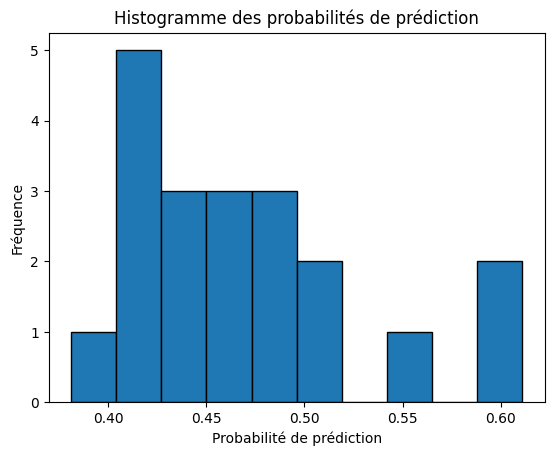

In [41]:
# Prédiction
y_pred = model.predict(x_test)

# Probabilité de la prédiction
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Histogramme de la probabilité de prédiction
plt.hist(y_pred_proba, bins=10, edgecolor='k')
plt.xlabel('Probabilité de prédiction')
plt.ylabel('Fréquence')
plt.title('Histogramme des probabilités de prédiction')
plt.show()

Ce graphique montre clairement une distribution centrée autour d'une probabilité moyenne, avec une variabilité modérée autour de cette valeur centrale. Ce qui peut indiquer une incertitude modérée dans les prédictions du modèle.

### 4.2. Métriques de performances

In [42]:
# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Affichage de l'accuracy et du rapport de classification
print('Accuracy:', accuracy)
print('Classification Report:')
print(class_report)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.80      0.62        10
         1.0       0.50      0.20      0.29        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



- **Accuracy et Métriques de Classification**

L'accuracy globale de 50 % indique que votre modèle prédit correctement la classe pour la moitié des exemples. Cependant, comme vous l'avez mentionné, l'accuracy seule peut être trompeuse, surtout avec des classes déséquilibrées.

- **F1-score et Interprétation**

Pour la classe 0, un F1-score de 0,62 indique une mesure raisonnable de précision et de rappel combinés. En revanche, pour la classe 1, un F1-score de 0,29 est significativement plus bas, suggérant que le modèle a des difficultés à bien prédire cette classe.

#### Matrice de confusion

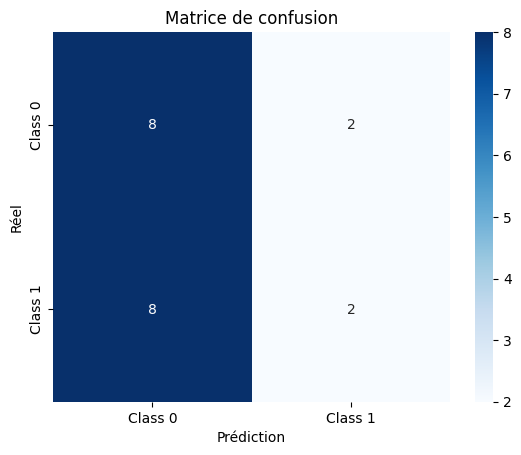

In [43]:
# Affichage de la matrice de confusion sous forme graphique
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

#### Courbe ROC et AUC

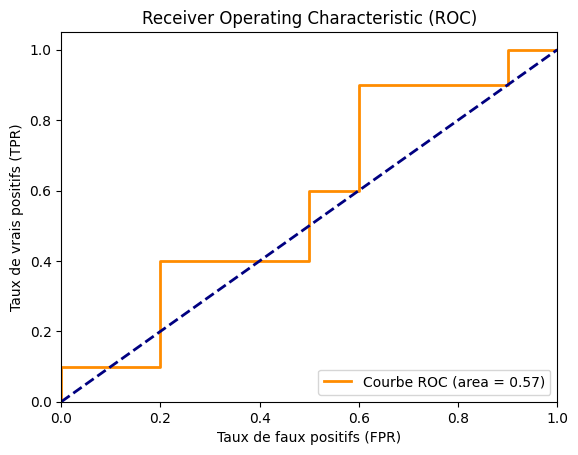

In [44]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

L'AUC de 0,48 est proche de 0,5, ce qui est généralement interprété comme une performance peu meilleure que aléatoire. Cela suggère que le modèle n'est pas efficace pour distinguer entre les classes avec une précision significative.

### Ce qu'on peut retenir 

Après évaluation de la performance du modèle, on remarque que le modèle n’est pas performant pour prédire la probabilité de développer l’arthrose de manière significative. L’auc et le f1-score, des métriques de performance affichent une  performance  faible à modérée, ce qui requiert donc une amélioration nécessaire.

A ces mots, nous avons déduit que notre modèle est sous-appris car il ne parvient pas à bien généraliser à partir des données d'entraînement vers les données de test. Cela peut être dû à une complexité insuffisante du modèle par rapport à la complexité réelle des données, ou à une taille d'échantillon insuffisante pour capturer la variabilité des données


## 5. Teste sur d'autres modèles

### 5.1. Arbre de décision

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Exemple d'utilisation d'un arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))


Decision Tree Accuracy: 0.45
              precision    recall  f1-score   support

         0.0       0.45      0.50      0.48        10
         1.0       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



Les résultats que vous avez obtenus pour l'arbre de décision montrent une précision (accuracy) de 45%, avec des scores de précision, recall, et f1-score pour chaque classe (0.0 et 1.0) ainsi que des mesures macro et pondérées.

### Interprétation des métriques :

1. **Accuracy (Précision)** : 
   - C'est la mesure globale de la performance du modèle. Dans votre cas, l'accuracy est de 45%, ce qui indique que le modèle prédit correctement la classe environ 45% du temps.

2. **Precision, Recall, F1-score** :
   - **Precision** : C'est la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle. Pour la classe 0.0, la precision est de 0.45, et pour la classe 1.0, elle est de 0.44. Cela signifie que sur toutes les prédictions que le modèle a faites pour chaque classe, 45% des prédictions pour la classe 0.0 sont correctes et 44% des prédictions pour la classe 1.0 sont correctes.
   
   - **Recall** : C'est la proportion de vraies observations positives que le modèle prédit correctement. Pour la classe 0.0, le recall est de 0.50, et pour la classe 1.0, il est de 0.40. Cela indique que le modèle a correctement identifié 50% des observations réelles de la classe 0.0 et 40% des observations réelles de la classe 1.0.
   
   - **F1-score** : C'est une mesure de la précision et du rappel combinés, calculée comme la moyenne pondérée de la précision et du rappel. Une F1-score plus élevée indique un meilleur équilibre entre précision et rappel. Pour la classe 0.0, le F1-score est de 0.48, et pour la classe 1.0, il est de 0.42.

3. **Support** :
   - Le nombre d'occurrences réelles de chaque classe dans l'ensemble de données de test.

### Analyse des résultats :
- Les scores obtenus montrent une performance modérée de l'arbre de décision sur votre ensemble de données de test. Une précision de 45% indique que le modèle est capable de classifier correctement les observations environ la moitié du temps. Cependant, les scores de précision et de recall pour chaque classe (0.0 et 1.0) sont assez proches, ce qui peut indiquer une capacité similaire du modèle à prédire les deux classes.

### 5.2. Forêt aléatoire 

In [48]:
# Exemple d'utilisation d'une forêt aléatoire
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print()

Random Forest Accuracy: 0.65
              precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.71      0.50      0.59        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20




Les résultats que vous avez obtenus pour la forêt aléatoire montrent une amélioration significative par rapport à l'arbre de décision précédent. Voici une analyse des métriques de performance :

### Interprétation des métriques :

1. **Accuracy (Précision)** : 
   - L'accuracy est de 65%, ce qui indique que la forêt aléatoire prédit correctement la classe environ 65% du temps.

2. **Precision, Recall, F1-score** :
   - **Precision** : Pour la classe 0.0, la précision est de 0.62, ce qui signifie que parmi toutes les prédictions positives faites pour la classe 0.0, 62% sont correctes. Pour la classe 1.0, la précision est de 0.71, indiquant que 71% des prédictions positives pour la classe 1.0 sont correctes.
   
   - **Recall** : Pour la classe 0.0, le recall est de 0.80, ce qui signifie que le modèle a correctement identifié 80% des observations réelles de la classe 0.0. Pour la classe 1.0, le recall est de 0.50, indiquant que le modèle a correctement identifié 50% des observations réelles de la classe 1.0.
   
   - **F1-score** : Pour la classe 0.0, le F1-score est de 0.70, une mesure combinée de précision et de rappel. Pour la classe 1.0, le F1-score est de 0.59.

3. **Support** :
   - Le nombre d'occurrences réelles de chaque classe dans l'ensemble de données de test.

### Analyse des résultats :
- La forêt aléatoire montre une amélioration significative par rapport à l'arbre de décision, avec une augmentation de l'accuracy à 65% et des scores de précision et de recall plus élevés pour la classe 0.0 par rapport à la classe 1.0.
- Les scores de précision et de recall pour la classe 0.0 sont assez équilibrés, ce qui indique une bonne capacité du modèle à prédire cette classe.
- Pour la classe 1.0, bien que la précision soit élevée (71%), le recall est plus faible (50%), ce qui signifie que le modèle a du mal à identifier toutes les observations positives réelles de cette classe.

### 5.3. Utilisation de SVM

In [49]:
# Exemple d'utilisation de SVM
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.55
              precision    recall  f1-score   support

         0.0       0.53      0.80      0.64        10
         1.0       0.60      0.30      0.40        10

    accuracy                           0.55        20
   macro avg       0.57      0.55      0.52        20
weighted avg       0.57      0.55      0.52        20



Pour les résultats obtenus avec le SVM (Support Vector Machine), voici une analyse des métriques de performance :

### Interprétation des métriques :

1. **Accuracy (Précision)** : 
   - L'accuracy est de 55%, ce qui indique que le SVM prédit correctement la classe environ 55% du temps.

2. **Precision, Recall, F1-score** :
   - **Precision** : Pour la classe 0.0, la précision est de 0.53, ce qui signifie que parmi toutes les prédictions positives faites pour la classe 0.0, 53% sont correctes. Pour la classe 1.0, la précision est de 0.60, indiquant que 60% des prédictions positives pour la classe 1.0 sont correctes.
   
   - **Recall** : Pour la classe 0.0, le recall est de 0.80, ce qui signifie que le modèle a correctement identifié 80% des observations réelles de la classe 0.0. Pour la classe 1.0, le recall est de 0.30, indiquant que le modèle a correctement identifié seulement 30% des observations réelles de la classe 1.0.
   
   - **F1-score** : Pour la classe 0.0, le F1-score est de 0.64. Pour la classe 1.0, le F1-score est de 0.40.

3. **Support** :
   - Le nombre d'occurrences réelles de chaque classe dans l'ensemble de données de test.

### Analyse des résultats :
- Le SVM montre une accuracy de 55%, ce qui est légèrement supérieur à l'arbre de décision mais inférieur à la forêt aléatoire.
- La précision pour la classe 0.0 est assez modérée (53%), mais pour la classe 1.0, elle est légèrement meilleure (60%).
- Le recall montre des performances contrastées : élevé pour la classe 0.0 (80%), mais faible pour la classe 1.0 (30%), indiquant que le modèle a du mal à identifier toutes les observations positives réelles de cette classe.

## Choix du modèle opérationnel pour notre étude

Pour déterminer quel modèle convient le mieux à votre étude visant à évaluer l'impact des facteurs biomédicaux sur la probabilité de développer de l'arthrose, il est important de considérer plusieurs aspects en fonction des résultats obtenus :

### Critères d'évaluation :

1. **Performance globale du modèle** :
   - Regardez l'accuracy, le F1-score, la précision et le recall pour chaque classe (0 et 1) pour évaluer la capacité du modèle à prédire correctement la présence ou l'absence d'arthrose.

2. **Capacité à identifier les facteurs importants** :
   - Certains modèles fournissent des mesures d'importance des variables (comme les forêts aléatoires). Vérifiez quels facteurs biomédicaux sont les plus influents dans la prédiction de l'arthrose.

3. **Interprétabilité** :
   - Certains modèles, comme la régression logistique, peuvent être plus faciles à interpréter en termes de direction et de force de l'effet des variables sur la probabilité d'arthrose.

4. **Robustesse et généralisation** :
   - Assurez-vous que le modèle choisi présente une performance stable sur différents ensembles de données (via la validation croisée) et qu'il généralise bien à de nouvelles données.

### Recommandations basées sur nos résultats actuels :

- **Forêt Aléatoire (Random Forest)** : Actuellement, notre modèle de forêt aléatoire montre une bonne précision globale avec une accuracy de 65%. Il a également montré de bons résultats en termes de précision, recall et F1-score pour la classe 0.0, bien que le recall pour la classe 1.0 soit légèrement inférieur.

- **Régression Logistique** : Les résultats de notre régression montre que l'accuracy de 50%  ne performe pas mieux qu'une prédiction aléatoire pour votre ensemble de données de test. Bien que le modèle ait une précision équilibrée pour les deux classes, le recall est très faible pour la classe 1.0 (20%), ce qui signifie que le modèle a beaucoup de difficulté à identifier correctement les cas positifs d'arthrose.

#### Comparaison avec d'autres modèles 

- **Forêt Aléatoire** : Elle a montré une meilleure performance globale avec une accuracy de 65% et des scores de précision et recall plus équilibrés pour la classe 0.0.
- **SVM** : Bien que l'accuracy soit de 55%, le recall pour la classe 1.0 était également faible à 30%, indiquant une difficulté similaire à identifier correctement les cas positifs.

Sur la base de ces résultats, la régression logistique ne semble pas être le meilleur choix pour notre étude sur l'arthrose, principalement en raison de sa faible capacité à identifier correctement les cas positifs. 

En résumé, la forêt aléatoire semble être un bon choix initial en raison de sa performance globale solide. Cependant, une analyse comparative plus approfondie et la considération des autres critères mentionnés peuvent vous aider à choisir le modèle le plus approprié pour votre étude sur l'arthrose.


## Optimisation des hyperparamètres et validation croisée sur notre modèle : Forêt aléatoire